In [1]:
import pandas as pd

data = pd.read_csv('../data.csv', sep='|', dtype={'client_id': str})
data.shape

(238616, 77)

In [2]:
data['Month'].value_counts()

Month
2019-04-01    26547
2019-03-01    26547
2019-02-01    26512
2019-01-01    26503
2018-08-01    26502
2018-10-01    26501
2018-09-01    26501
2018-12-01    26501
2018-11-01    26501
Name: count, dtype: int64

In [3]:
len(data.client_id.unique())

26561

In [4]:
data_9m = pd.DataFrame(data.client_id.value_counts().reset_index())
data_9m.columns = ['client_id', 'q_months']

In [5]:
data_9m

,client_id,q_months
0,5856970,9
1,5895899,9
2,4712252,9
3,7304330,9
4,6657428,9
...,...,...
26556,4424661,1
26557,5643352,1
26558,6641590,1
26559,264018,1


In [6]:
data_9m[data_9m.q_months == 9].shape

(26483, 2)

In [7]:
data_9m = data_9m[data_9m.q_months == 9].copy()

In [8]:
data.Package_Active.value_counts()

Package_Active
No     234177
Yes      4438
Name: count, dtype: int64

In [9]:
data_no_package = data[(data.Package_Active == 'No') & (data.Month == '2019-01-01')][['client_id']]
data_no_package.shape

(26026, 1)

Use case:

- Lead Window: Only one month
- Prediction Windows -> Last Two Months

In [10]:
data.Target.value_counts()

Target
0.0    176359
1.0     62256
Name: count, dtype: int64

In [11]:
data_target = data[(data.Target == 1) & (data.Month.isin(['2019-04-01', '2019-03-01']))][
    ['client_id']].drop_duplicates()
data_target.shape

(6926, 1)

In [12]:
data_target['TGT'] = 1

# New business condition

In [13]:
len(data[(data.CreditCard_CoBranding == 'Yes') & (data.Month == '2019-01-01')].client_id.unique())

2843

In [14]:
data_cobranding = data[(data.CreditCard_CoBranding == 'Yes') & (data.Month == '2019-01-01')][['client_id']]
data_cobranding.shape

(2843, 1)

In [15]:
data_cross_cobranding = data_cobranding.merge(data_target, how='left', on='client_id').fillna(0)
data_cross_cobranding.TGT.value_counts()

TGT
0.0    2836
1.0       7
Name: count, dtype: int64

Filter clients by:
- 9 months with Data
- No Co Branding
- No Active Package


In [16]:
data_cobranding_no = data[(data.CreditCard_CoBranding == 'No') & (data.Month == '2019-01-01')][['client_id']]

In [17]:
universe = data_9m \
    .merge(data_no_package, how='inner', on='client_id') \
    .merge(data_cobranding_no, how='inner', on='client_id') \
    .merge(data_target, how='left', on='client_id').fillna(0)

universe.TGT.value_counts()

TGT
0.0    16368
1.0     6823
Name: count, dtype: int64

In [18]:
universe

,client_id,q_months,TGT
0,5856970,9,1.0
1,5895899,9,0.0
2,4712252,9,0.0
3,6657428,9,0.0
4,6604065,9,0.0
...,...,...,...
23186,5489595,9,1.0
23187,4205458,9,1.0
23188,2964835,9,0.0
23189,6350133,9,1.0


# Exploratory Data Analysis (EDA)

In [19]:
training_window = data[(data.Month.isin(['2018-08-01',
                                         '2018-09-01',
                                         '2018-10-01',
                                         '2018-11-01',
                                         '2018-12-01',
                                         '2019-01-01'
                                         ]))]

training_window.shape

(159009, 77)

In [20]:
training_window

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,Yes,Yes,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238597,1673642,0.0,2018-11-01,2017-08-18,2017-09-26,No,Yes,No,No,No,...,0.0,0.0,1.0,0.0,0.0,0.0,No,Yes,NaN,NaN
238603,6145735,1.0,2018-11-01,2014-10-26,2014-10-26,No,Yes,No,No,No,...,0.0,0.0,1.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
238604,5638786,1.0,2018-11-01,2012-12-26,2017-03-08,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,1.0,0.0,Yes,No,NaN,NaN
238608,3824781,0.0,2018-08-01,2014-11-27,2019-01-04,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN


In [21]:
training_window.client_id.value_counts()

client_id
5856970    6
3852147    6
1129478    6
711456     6
2531821    6
          ..
6264756    2
5124642    1
6623284    1
1419642    1
6858355    1
Name: count, Length: 26509, dtype: int64

In [22]:
len(universe.client_id.unique())

23191

In [23]:
len(data.client_id.unique())

26561

In [24]:
len(training_window.client_id.unique())

26509

In [25]:
training_window = training_window.merge(universe, how='inner', on='client_id')

In [26]:
len(training_window.client_id.unique())

23191

In [27]:
training_window.client_id.value_counts()

client_id
5856970    6
2428341    6
6454439    6
5678167    6
7308381    6
          ..
6210931    6
2758381    6
6348905    6
5982253    6
5967858    6
Name: count, Length: 23191, dtype: int64

In [28]:
training_window[training_window.client_id == '5856970'][['SavingAccount_Balance_Average']].T

,0,23560,59432,96224,98432,120274
SavingAccount_Balance_Average,406.35,1987.45,5638.1,107.23,2238.61,18.28


In [29]:
universe_r = universe.merge(data[data.Month == '2019-04-01'][['Region', 'client_id']], how='left',
                            on='client_id').fillna('SD')
universe_r

,client_id,q_months,TGT,Region
0,5856970,9,1.0,AMBA Resto
1,5895899,9,0.0,REGION NORTE GRANDE ARGENTINO
2,4712252,9,0.0,BUENOS AIRES
3,6657428,9,0.0,REGION CUYO
4,6604065,9,0.0,CABA Centro/Norte
...,...,...,...,...
23186,5489595,9,1.0,REGION NORTE GRANDE ARGENTINO
23187,4205458,9,1.0,BUENOS AIRES
23188,2964835,9,0.0,BUENOS AIRES
23189,6350133,9,1.0,AMBA Resto


In [30]:
universe_r.TGT.value_counts()

TGT
0.0    16368
1.0     6823
Name: count, dtype: int64

In [31]:
universe_r[['Region', 'TGT']].value_counts()

Region                         TGT
BUENOS AIRES                   0.0    4846
REGION CENTRO                  0.0    3463
REGION NORTE GRANDE ARGENTINO  0.0    2618
BUENOS AIRES                   1.0    2138
REGION PATAGONICA              0.0    1612
CABA Centro/Norte              0.0    1436
AMBA Resto                     0.0    1236
REGION CUYO                    0.0    1151
REGION CENTRO                  1.0    1116
REGION NORTE GRANDE ARGENTINO  1.0    1056
REGION PATAGONICA              1.0     820
CABA Centro/Norte              1.0     612
AMBA Resto                     1.0     592
REGION CUYO                    1.0     489
SD                             0.0       6
Name: count, dtype: int64

In [32]:
universe_r[['Region']].value_counts()

Region                       
BUENOS AIRES                     6984
REGION CENTRO                    4579
REGION NORTE GRANDE ARGENTINO    3674
REGION PATAGONICA                2432
CABA Centro/Norte                2048
AMBA Resto                       1828
REGION CUYO                      1640
SD                                  6
Name: count, dtype: int64

In [33]:
universe_r[universe_r.TGT == 1][['Region']].value_counts()

Region                       
BUENOS AIRES                     2138
REGION CENTRO                    1116
REGION NORTE GRANDE ARGENTINO    1056
REGION PATAGONICA                 820
CABA Centro/Norte                 612
AMBA Resto                        592
REGION CUYO                       489
Name: count, dtype: int64

# Identity Features
For last month in trading window

In [34]:
training_window.Client_Age_grp.value_counts()

Client_Age_grp
Entre 40 y 49 años    38313
Entre 30 y 39 años    34063
Entre 50 y 59 años    30588
Entre 60 y 64 años    12282
Entre 65 y 69 años     9685
Entre 18 y 29 años     7509
Mayor a 70 años        6701
Menor a 18 años           5
Name: count, dtype: int64

In [35]:
data.CreditCard_Product.value_counts()

CreditCard_Product
J55660104XX012    17298
J55660202XX012    12047
J55660124XX012     4978
J55660102XX012      834
J55660123XX012      774
J55660702XX012      567
J55661002XX012      138
Name: count, dtype: int64

# Miss


In [36]:
training_window.columns[training_window.isnull().any()].tolist()

['SavingAccount_Balance_Average', 'Region', 'CreditCard_Product']

In [37]:
training_window[training_window.SavingAccount_Balance_Average.fillna(-9999) == -9999]

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product,q_months,TGT
50026,4473325,0.0,2018-12-01,2008-05-27,2017-05-18,Yes,Yes,No,No,No,...,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN,9,0.0
50027,4837071,1.0,2018-12-01,2013-02-21,2018-09-04,No,No,No,No,No,...,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN,9,1.0
50029,4525957,1.0,2019-01-01,2012-10-16,2016-08-31,Yes,Yes,No,No,No,...,1.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN,9,1.0
139145,6412619,0.0,2019-01-01,2015-07-08,2018-06-02,No,No,No,Yes,No,...,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN,9,0.0


In [38]:
import numpy as np

training_window['SavingAccount_Balance_Average'] = np.where(training_window.SavingAccount_Balance_Average.isnull(),
                                                            training_window.SavingAccount_Balance_FirstDate - training_window.SavingAccount_Debits_Amounts + training_window.SavingAccount_Credits_Amounts,
                                                            training_window.SavingAccount_Balance_Average)

In [39]:
# Outliers
training_window['SavingAccount_Days_with_use'].describe()

count    139146.000000
mean          2.512685
std           3.831400
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          41.000000
Name: SavingAccount_Days_with_use, dtype: float64

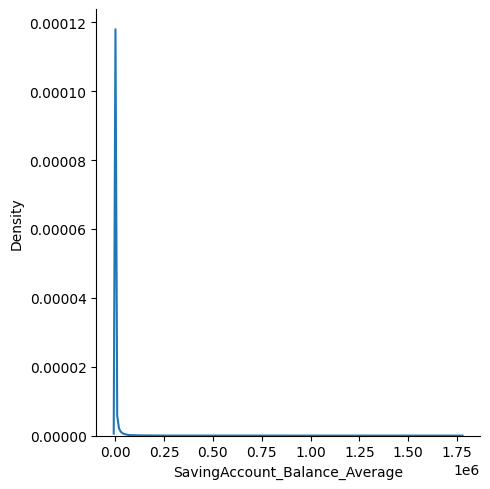

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a distribution plot
sns.displot(training_window['SavingAccount_Balance_Average'], kind='kde')

# display the plot
plt.show()

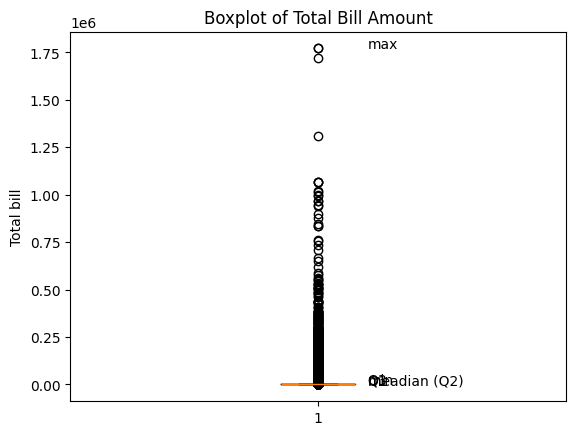

In [41]:
plt.boxplot(training_window['SavingAccount_Balance_Average'])

# add labels for five number summary
plt.text(x=1.1, y=training_window['SavingAccount_Balance_Average'].min(), s='min')
plt.text(x=1.1, y=training_window['SavingAccount_Balance_Average'].quantile(0.25), s='Q1')
plt.text(x=1.1, y=training_window['SavingAccount_Balance_Average'].median(), s='meadian (Q2)')
plt.text(x=1.1, y=training_window['SavingAccount_Balance_Average'].quantile(0.75), s='Q3')
plt.text(x=1.1, y=training_window['SavingAccount_Balance_Average'].max(), s='max')

# add the graph title and axes labels
plt.title('Boxplot of Total Bill Amount')
plt.ylabel('Total bill')

# display the plot
plt.show()

In [42]:
training_window['SavingAccount_Balance_Average'].describe()

count    1.391460e+05
mean     4.094871e+03
std      2.293939e+04
min     -5.665900e+02
25%      0.000000e+00
50%      1.032500e+01
75%      1.473138e+03
max      1.771201e+06
Name: SavingAccount_Balance_Average, dtype: float64

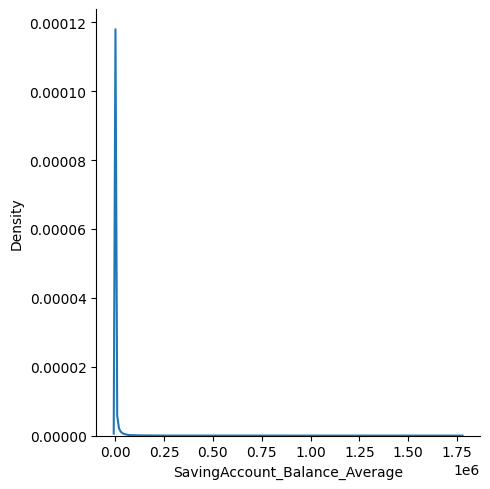

In [43]:
# plot a distribution plot
sns.displot(training_window['SavingAccount_Balance_Average'], kind='kde')

# display the plot
plt.show()

In [44]:
p95 = training_window['SavingAccount_Balance_Average'].quantile(0.95)
p99 = training_window['SavingAccount_Balance_Average'].quantile(0.99)
three_sigma = 3 * training_window['SavingAccount_Balance_Average'].std()

print('p95         ', p95)
print('p99         ', p99)
print('Three sigma ', three_sigma)

p95          17043.66
p99          70055.67999999813
Three sigma  68818.178586892


In [45]:
training_window['SavingAccount_Balance_Average'] = np.where(
    training_window['SavingAccount_Balance_Average'] > three_sigma,
    three_sigma,
    training_window['SavingAccount_Balance_Average'])

training_window['SavingAccount_Balance_Average'].describe()

count    139146.000000
mean       3179.457488
std        9821.897057
min        -566.590000
25%           0.000000
50%          10.325000
75%        1473.137500
max       68818.178587
Name: SavingAccount_Balance_Average, dtype: float64

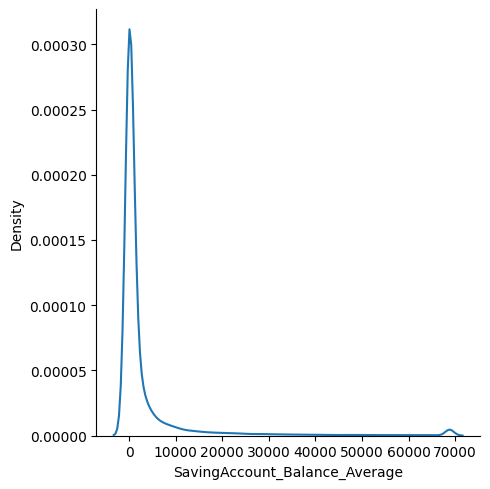

In [46]:
# plot a distribution plot
sns.displot(training_window['SavingAccount_Balance_Average'], kind='kde')

# display the plot
plt.show()

In [47]:
training_window['SavingAccount_Balance_Average'] = np.where(training_window['SavingAccount_Balance_Average'] > p95,
                                                            p95,
                                                            training_window['SavingAccount_Balance_Average'])

training_window['SavingAccount_Balance_Average'].describe()

count    139146.000000
mean       2026.112910
std        4351.634834
min        -566.590000
25%           0.000000
50%          10.325000
75%        1473.137500
max       17043.660000
Name: SavingAccount_Balance_Average, dtype: float64

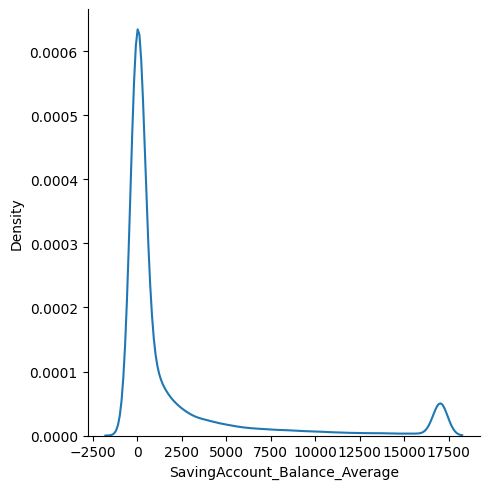

In [48]:
# plot a distribution plot
sns.displot(training_window['SavingAccount_Balance_Average'], kind='kde')

# display the plot
plt.show()

In [49]:
training_window['SavingAccount_Balance_Average'].describe()

count    139146.000000
mean       2026.112910
std        4351.634834
min        -566.590000
25%           0.000000
50%          10.325000
75%        1473.137500
max       17043.660000
Name: SavingAccount_Balance_Average, dtype: float64